In [7]:
# performing linear algebra 
import numpy as np 

# data processing 
import pandas as pd 

# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv") 
  
print (df.head) 

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop(['Unnamed: 32', 'id'], axis = 1,  inplace=True) 
print(df.shape)

(569, 31)


In [5]:
def diagnosis_value(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
  
df['diagnosis'] = df['diagnosis'].apply(diagnosis_value) 

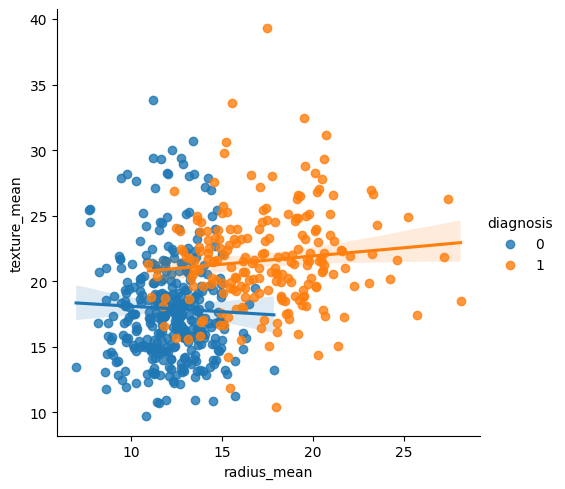

In [8]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df) 

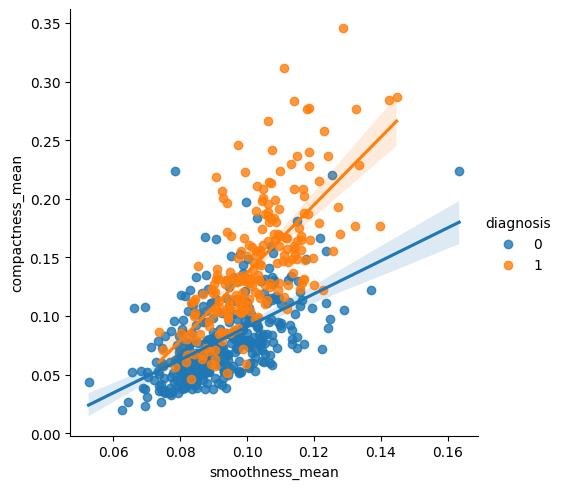

In [9]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',  
           data = df, hue = 'diagnosis') 

In [10]:
X = np.array(df.iloc[:, 1:]) 
y = np.array(df['diagnosis']) 

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.33, random_state = 42) 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=13)

In [14]:
knn.score(X_test, y_test) 

0.9627659574468085

In [15]:
neighbors = [] 
cv_scores = [] 

from sklearn.model_selection import cross_val_score 
# perform 10 fold cross validation 
for k in range(1, 51, 2): 
	neighbors.append(k) 
	knn = KNeighborsClassifier(n_neighbors = k) 
	scores = cross_val_score( 
		knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
	cv_scores.append(scores.mean()) 

The optimal number of neighbors is  13 


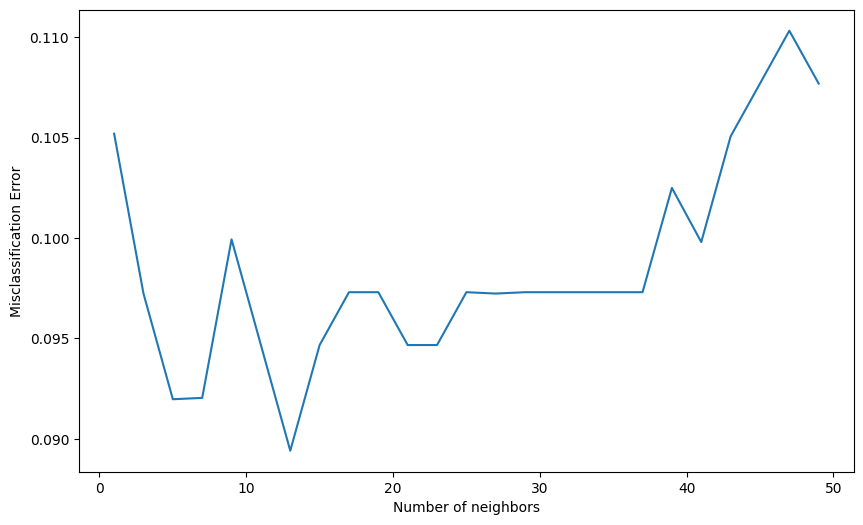

In [16]:
MSE = [1-x for x in cv_scores] 

# determining the best k 
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 

# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 